In [1]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
WINDOW = 1

# Using All Weather Variables - Redundant

In [3]:
FILENAME = "engineered_worldweatheronline_normalized_manila_2015_1day"
weather_dataset = pd.read_csv("windows_" + FILENAME + "/" + FILENAME + "_win" + str(WINDOW) + ".csv", skipinitialspace=True)
precip = weather_dataset.precipMM
weather_dataset = weather_dataset.drop(weather_dataset.columns[0], axis=1)

cols_to_remove = []
# For Window 1 LANG
temp = list(range(12, 16))
windspd = list(range(16, 20))
cond = list(range(20, 24))
hum = list(range(24, 28))
vis = list(range(28, 32))
pres = list(range(32, 36))
cloud = list(range(36, 40))
heatindex = list(range(40, 44))
dewpoint = list(range(44, 48))
windchill = list(range(48, 52))
windgust = list(range(52, 56))
feelslike = list(range(56, 60))


# For Window 2 and above
if WINDOW >= 2:
    temp = list(range(12, 15))
    windspd = list(range(15, 18))
    cond = list(range(18, 21))
    hum = list(range(21, 24))
    vis = list(range(24, 27))
    pres = list(range(27, 30))
    cloud = list(range(30, 33))
    heatindex = list(range(33, 36))
    dewpoint = list(range(36, 39))
    windchill = list(range(39, 42))
    windgust = list(range(42, 45))
    feelslike = list(range(45, 48))

cols_to_remove = [heatindex + windchill + feelslike]
#cols_to_remove = [temp  + windspd + cond + hum + vis + pres + cloud + heatindex + dewpoint + windchill + windgust + feelslike]
w = weather_dataset.drop(weather_dataset.columns[cols_to_remove], axis=1, inplace = False)


#Original Features
##cols_to_remove = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cols_to_remove = [7, 9, 11]
#cols_to_remove = [0, 2, 4, 5, 7, 8, 9, 11]

w = w.drop(w.columns[cols_to_remove], axis=1, inplace = False)
weather_dataset = w
weather_dataset.head()


,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,dewPointC,windGustKmph,tempC_Emean,...,cloudcover_Emax,cloudcover_Esum,dewPointC_Emean,dewPointC_Emin,dewPointC_Emax,dewPointC_Esum,windGustKmph_Emean,windGustKmph_Emin,windGustKmph_Emax,windGustKmph_Esum
0,0.232552,0.350260,0.565789,0.810009,0.968750,0.775503,0.333906,0.569311,0.285807,0.232552,...,0.333906,0.333906,0.569311,0.569311,0.569311,0.569311,0.285807,0.285807,0.285807,0.285807
1,0.231250,0.441406,0.585526,0.765097,1.000000,0.848240,0.308802,0.504407,0.334925,0.231901,...,0.333906,0.642708,0.536859,0.504407,0.569311,1.073718,0.310366,0.285807,0.334925,0.620732
2,0.241667,0.305398,0.631579,0.808877,1.000000,0.826509,0.484427,0.570513,0.227720,0.235156,...,0.484427,1.127135,0.548077,0.504407,0.570513,1.644231,0.282817,0.227720,0.334925,0.848452
3,0.278385,0.205374,0.580044,0.838240,1.000000,0.762392,0.418542,0.612179,0.173394,0.245964,...,0.484427,1.545677,0.564103,0.504407,0.612179,2.256410,0.255462,0.173394,0.334925,1.021846
4,0.323698,0.177083,0.399123,0.842995,0.848307,0.742816,0.361146,0.685897,0.150246,0.261510,...,0.484427,1.906823,0.588462,0.504407,0.685897,2.942308,0.234418,0.150246,0.334925,1.172092


In [4]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = precip

## Ridge Regression using train_test_split

In [5]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=-0.2)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
# Train the model using the training set
ridge.fit(X_train,Y_train)

# Train the model using the training sets
ridge.fit(X_train,Y_train)

Ridge(alpha=-0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
p = ridge.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train = r2_score(Y_test, p)
rmse_train = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train)
print("RMSE", rmse_train)

R2 score -15.5598432158
RMSE 0.269304859361


In [7]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', ridge.coef_)

Regression Coefficients: 
 [ 0.09058409  0.16549879  0.05543712 -0.09204713 -0.30717181 -0.13511032
  0.04853249  0.03910117  0.11752618  0.11118786 -0.00635423  0.21720186
 -0.05111785 -0.20913233 -0.27656501  0.02133019 -0.14482702 -0.09120731
 -0.46274206  0.04269692  0.01198943 -0.01262268  0.13259197  0.02901704
 -0.06662166 -0.07734869 -0.31164292  0.01541975  0.07610019 -0.02801818
  0.4745091   0.1140988  -0.0465486   0.00288681  0.06101164 -0.48506317
  0.01020376  0.08185676 -0.02464899  0.34645399  0.01586901 -0.15545794
 -0.21219823 -0.08646327  0.2138611  -0.        ]


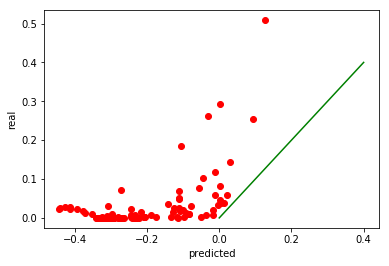

In [8]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

# pl.savefig('wwo_model_results/ridge_all_scatterplot.png')

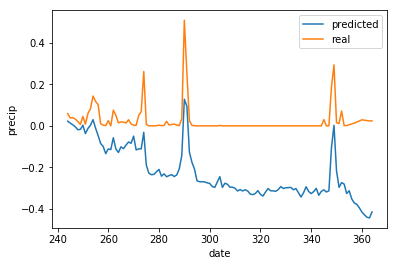

In [9]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

# pl.savefig('wwo_model_results/ridge_all_linegraph.png')

## Ridge Regression using 10-fold cross validation

In [10]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge.fit(x_train, y_train)
    p = ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [11]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train)
print('RMSE on training: %.6f'  %rmse_train)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv)

Method: Ridge Regression
R2 score on training: -15.559843
RMSE on training: 0.269305
RMSE on 10-fold CV: 0.802846


## Play with alpha

Ridge Regression
alpha	 R2SCORE_train	 RMSE_train	 RMSE_10cv

     alpha  r2score_train
1  -0.9405      -5.823615
3  -0.8415      -9.810335
4  -0.7920      -9.904068
11 -0.4455      -8.315277
19 -0.0495      -1.164523


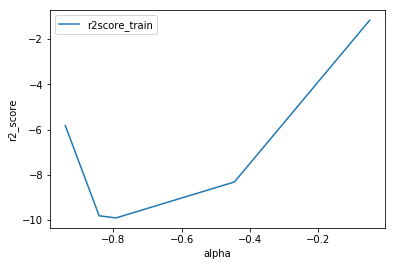

In [12]:
print('Ridge Regression')
print('alpha\t R2SCORE_train\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(-0.99,-0.0,20,endpoint=False)

t_alpha = []

for a in alpha:
    
    # Create linear regression object with a ridge coefficient 0.5
    ridge = Ridge(fit_intercept=True, alpha=a)

    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

    # Train the model using the training sets
    ridge.fit(X_train,Y_train)
    
    p = ridge.predict(X_test)

    # Compute RMSE and r2_score on training data
    r2score_train = r2_score(Y_test, p)
    rmse_train = np.sqrt(mean_squared_error(Y_test, p))
    
    # Now let's compute RMSE using 10-fold x-validation
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ridge.fit(x_train, y_train)
        p = ridge.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)

    rmse_10cv = np.sqrt(xval_err/len(x))
    
#     print('{:.3f}\t {:.6f}\t\t {:.6f}\t\t {:.6f}'.format(a,r2score_train,rmse_train,rmse_10cv))
    
    row = [a, r2score_train]
    t_alpha.append(row)

cols = ['alpha', 'r2score_train']
t_alpha = pd.DataFrame(t_alpha, columns=cols)

t_alpha = t_alpha[t_alpha.r2score_train > -10]
print(t_alpha[t_alpha.r2score_train > -10])

# Plot outputs
%matplotlib inline
pl.plot(t_alpha.alpha, t_alpha.r2score_train)
pl.ylabel('r2_score')
pl.xlabel('alpha')
pl.legend()
pl.show()

pl.savefig('wwo_model_results/ridge_all.png')

# Using Correlated Weather Variables

In [13]:
# Remove unused columns and reorder 
FILENAME = "engineered_worldweatheronline_normalized_manila_2015_1day"
weather_dataset = pd.read_csv("windows_" + FILENAME + "/" + FILENAME + "_win" + str(WINDOW) + ".csv", skipinitialspace=True)
weather_dataset = weather_dataset.drop(weather_dataset.columns[0], axis=1)

cols_to_remove = []
# For Window 1 LANG
temp = list(range(12, 16))
windspd = list(range(16, 20))
cond = list(range(20, 24))
hum = list(range(24, 28))
vis = list(range(28, 32))
pres = list(range(32, 36))
cloud = list(range(36, 40))
heatindex = list(range(40, 44))
dewpoint = list(range(44, 48))
windchill = list(range(48, 52))
windgust = list(range(52, 56))
feelslike = list(range(56, 60))


# For Window 2 and above
if WINDOW >= 2:
    temp = list(range(12, 15))
    windspd = list(range(15, 18))
    cond = list(range(18, 21))
    hum = list(range(21, 24))
    vis = list(range(24, 27))
    pres = list(range(27, 30))
    cloud = list(range(30, 33))
    heatindex = list(range(33, 36))
    dewpoint = list(range(36, 39))
    windchill = list(range(39, 42))
    windgust = list(range(42, 45))
    feelslike = list(range(45, 48))


cols_to_remove = [temp  + windspd + vis + pres + heatindex + windchill + windgust + feelslike]
# cols_to_remove = [temp  + windspd + cond + hum + vis + pres + cloud + heatindex + dewpoint + windchill + windgust + feelslike]
w = weather_dataset.drop(weather_dataset.columns[cols_to_remove], axis=1, inplace = False)


#Original Features
cols_to_remove = [0, 1, 4, 5, 7, 9, 10, 11]

w = w.drop(w.columns[cols_to_remove], axis=1, inplace = False)
weather_dataset = w
weather_dataset.head()


,cond,humidity,cloudcover,dewPointC,cond_Emean,cond_Emin,cond_Emax,cond_Esum,humidity_Emean,humidity_Emin,humidity_Emax,humidity_Esum,cloudcover_Emean,cloudcover_Emin,cloudcover_Emax,cloudcover_Esum,dewPointC_Emean,dewPointC_Emin,dewPointC_Emax,dewPointC_Esum
0,0.565789,0.810009,0.333906,0.569311,0.565789,0.565789,0.565789,0.565789,0.810009,0.810009,0.810009,0.810009,0.333906,0.333906,0.333906,0.333906,0.569311,0.569311,0.569311,0.569311
1,0.585526,0.765097,0.308802,0.504407,0.575658,0.565789,0.585526,1.151316,0.787553,0.765097,0.810009,1.575106,0.321354,0.308802,0.333906,0.642708,0.536859,0.504407,0.569311,1.073718
2,0.631579,0.808877,0.484427,0.570513,0.594298,0.565789,0.631579,1.782895,0.794661,0.765097,0.810009,2.383982,0.375712,0.308802,0.484427,1.127135,0.548077,0.504407,0.570513,1.644231
3,0.580044,0.838240,0.418542,0.612179,0.590735,0.565789,0.631579,2.362939,0.805556,0.765097,0.838240,3.222222,0.386419,0.308802,0.484427,1.545677,0.564103,0.504407,0.612179,2.256410
4,0.399123,0.842995,0.361146,0.685897,0.552412,0.399123,0.631579,2.762061,0.813043,0.765097,0.842995,4.065217,0.381365,0.308802,0.484427,1.906823,0.588462,0.504407,0.685897,2.942308


In [14]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = precip

## Ridge Regression using train_test_split

In [15]:
# Create ridge regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=-0.7)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Train the model using the training set
ridge.fit(X_train,Y_train)

Ridge(alpha=-0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
p = ridge.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train_corr = r2_score(Y_test, p)
rmse_train_corr = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train_corr)
print("RMSE", rmse_train_corr)

R2 score -0.69695354662
RMSE 0.0862086921387


In [17]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', ridge.coef_)

Regression Coefficients: 
 [-0.15655689 -0.32249685  0.29275904 -0.09230484  0.0529746   0.15629162
 -0.19749741  0.04334169  0.03761195  0.04594448 -0.09708863 -0.02158904
 -0.00732355  0.3691722  -0.50375015  0.03133272  0.03566976  0.32828997
 -0.16706063 -0.02506646 -0.        ]


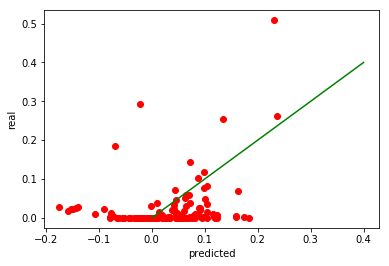

In [18]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

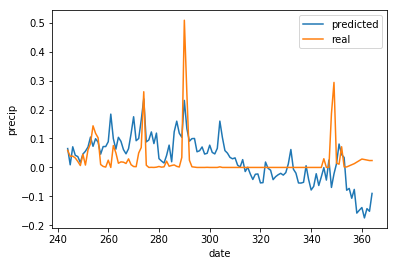

In [19]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

## Ridge Regression using 10-fold cross validation

In [20]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge.fit(x_train, y_train)
    p = ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv_corr = np.sqrt(xval_err/len(x))

In [21]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train_corr)
print('RMSE on training: %.6f'  %rmse_train_corr)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv_corr)

Method: Ridge Regression
R2 score on training: -0.696954
RMSE on training: 0.086209
RMSE on 10-fold CV: 0.104181


## Play with alpha

Ridge Regression
alpha	 R2SCORE_train	 RMSE_train	 RMSE_10cv

-0.990	 -0.761186		 0.087825		 0.073776
-0.941	 -0.708878		 0.086511		 0.106065
-0.891	 -0.665713		 0.085411		 0.422421
-0.841	 -0.627288		 0.084421		 0.612107
-0.792	 -0.592308		 0.083508		 0.209641
-0.742	 -0.578796		 0.083153		 0.130298
-0.693	 -0.757702		 0.087738		 0.104506
-0.643	 -3.573589		 0.141529		 0.146361
-0.594	 -8750.132677		 6.190821		 0.300576
-0.544	 -17.232493		 0.282578		 1.295541
-0.495	 -10.219657		 0.221669		 0.457234
-0.446	 -15.781360		 0.271100		 0.194825
-0.396	 -42.494807		 0.436450		 0.190668
-0.346	 -77.612531		 0.586762		 0.076793
-0.297	 -4240.339338		 4.309904		 0.117550
-0.247	 -23.216445		 0.325665		 0.053742
-0.198	 -4.235300		 0.151421		 0.051402
-0.148	 -1.528406		 0.105230		 0.259161
-0.099	 0.332155		 0.054082		 0.530170
-0.049	 -0.331082		 0.076352		 0.061122
     alpha  r2score_train
0  -0.9900      -0.761186
1  -0.9405      -0.708878
2  -0.8910      -0.665713
3  -0.8415      -0.6272

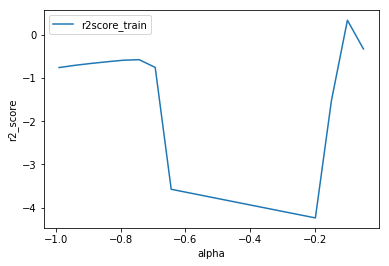

In [22]:
print('Ridge Regression')
print('alpha\t R2SCORE_train\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(-0.99,-0.0,20,endpoint=False)

t_alpha = []

for a in alpha:
    
    # Create linear regression object with a ridge coefficient 0.5
    ridge = Ridge(fit_intercept=True, alpha=a)

    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

    # Train the model using the training sets
    ridge.fit(X_train,Y_train)
    
    p = ridge.predict(X_test)

    # Compute RMSE and r2_score on training data
    r2score_train = r2_score(Y_test, p)
    rmse_train = np.sqrt(mean_squared_error(Y_test, p))
    
    # Now let's compute RMSE using 10-fold x-validation
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ridge.fit(x_train, y_train)
        p = ridge.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)

    rmse_10cv = np.sqrt(xval_err/len(x))
    
    print('{:.3f}\t {:.6f}\t\t {:.6f}\t\t {:.6f}'.format(a,r2score_train,rmse_train,rmse_10cv))
    
    row = [a, r2score_train]
    t_alpha.append(row)

cols = ['alpha', 'r2score_train']
t_alpha = pd.DataFrame(t_alpha, columns=cols)

t_alpha = t_alpha[t_alpha.r2score_train > -10]
print(t_alpha[t_alpha.r2score_train > -10])

# Plot outputs
%matplotlib inline
pl.plot(t_alpha.alpha, t_alpha.r2score_train)
pl.ylabel('r2_score')
pl.xlabel('alpha')
pl.legend()
pl.show()

pl.savefig('wwo_model_results/ridge_corr_dwpt.png')